In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


# Import the train data and test data

In [2]:
df_train = pd.read_csv('C:/Users/SHORMS/Desktop/train_2v.csv')
df_test = pd.read_csv('C:/Users/SHORMS/Desktop/test_2v.csv')

# Explore the train data

In [3]:
#Find out if there are null values in the train data
print(df_train.isnull().values.any())


True


In [4]:
#Find out the number of null values in each variable
print(df_train.isnull().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [5]:
#print a summary of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
#view some basic statistical details like percentile, mean, std etc. of the train data
df_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [7]:
# replace missing values in the column smoking status with the categorical variable 'unknown'
df_train['smoking_status'] = df_train['smoking_status'].fillna('unknown')

In [8]:
print(df_train.isnull().sum())

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64


In [9]:
# drop all rows of bmi with NaN values
df_train.dropna(axis=0,inplace=True)

In [10]:
#return the top 5 rows of the train data
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0


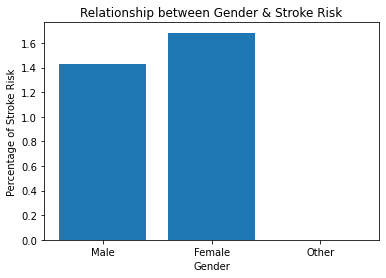

In [11]:
column_gender = df_train.groupby(['gender'], as_index=False)
column_gender_count = column_gender.count()['stroke']
column_gender_sum = column_gender.sum()['stroke']
column_gender_percentage = column_gender_sum / column_gender_count * 100


plt.bar(x=[0,1,2], height=column_gender_percentage, tick_label=['Male', 'Female', 'Other'])
plt.title("Relationship between Gender & Stroke Risk")
plt.xlabel("Gender")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

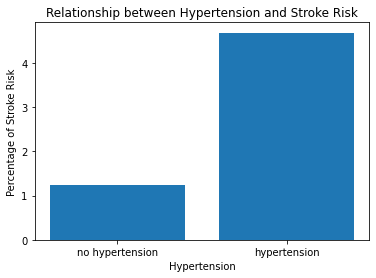

In [12]:
column_hypertension = df_train.groupby(['hypertension'], as_index=False)
column_hypertension_count = column_hypertension.count()['stroke']
column_hypertension_sum = column_hypertension.sum()['stroke']
column_hypertension_percentage = column_hypertension_sum / column_hypertension_count * 100

plt.bar(x=[0,1], height=column_hypertension_percentage, tick_label=['no hypertension','hypertension'])
plt.title("Relationship between Hypertension and Stroke Risk")
plt.xlabel('Hypertension')
plt.ylabel("Percentage of Stroke Risk")
plt.show()

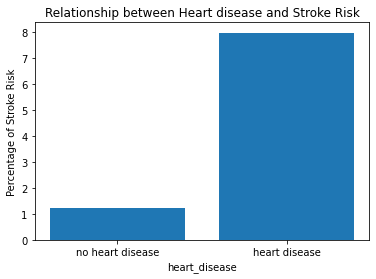

In [13]:
column_heartdisease = df_train.groupby(['heart_disease'], as_index=False)
column_heartdisease_count = column_heartdisease.count()['stroke']
column_heartdisease_sum = column_heartdisease.sum()['stroke']
column_heartdisease_percentage = column_heartdisease_sum / column_heartdisease_count * 100


plt.bar(x=[0,1], height=column_heartdisease_percentage, tick_label=['no heart disease', 'heart disease'])
plt.title("Relationship between Heart disease and Stroke Risk")
plt.xlabel('heart_disease')
plt.ylabel("Percentage of Stroke Risk")
plt.show()

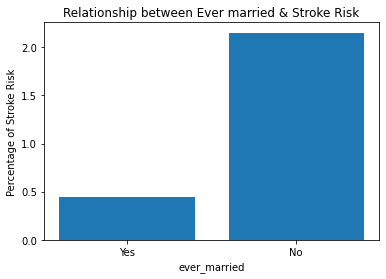

In [14]:
column_evermarried = df_train.groupby(['ever_married'], as_index=False)
column_evermarried_count = column_evermarried.count()['stroke']
column_evermarried_sum = column_evermarried.sum()['stroke']
column_evermarried_percentage = column_evermarried_sum / column_evermarried_count * 100


plt.bar(x=[0,1], height=column_evermarried_percentage, tick_label=['Yes', 'No'])
plt.title("Relationship between Ever married & Stroke Risk")
plt.xlabel("ever_married")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

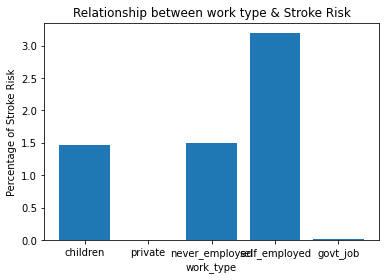

In [15]:
column_worktype = df_train.groupby(['work_type'], as_index=False)
column_worktype_count = column_worktype.count()['stroke']
column_worktype_sum = column_worktype.sum()['stroke']
column_worktype_percentage = column_worktype_sum / column_worktype_count * 100


plt.bar(x=[0,1,2,3,4], height=column_worktype_percentage, tick_label=['children', 'private', 'never_employed', 'self_employed', 'govt_job'])
plt.title("Relationship between work type & Stroke Risk")
plt.xlabel("work_type")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

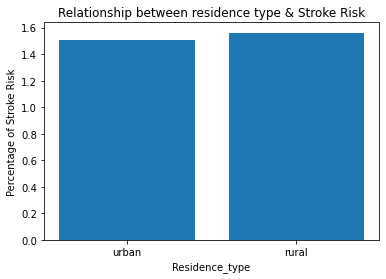

In [16]:
column_residencetype = df_train.groupby(['Residence_type'], as_index=False)
column_residencetype_count = column_residencetype.count()['stroke']
column_residencetype_sum = column_residencetype.sum()['stroke']
column_residencetype_percentage = column_residencetype_sum / column_residencetype_count * 100


plt.bar(x=[0,1], height=column_residencetype_percentage, tick_label=['urban','rural'])
plt.title("Relationship between residence type & Stroke Risk")
plt.xlabel("Residence_type")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

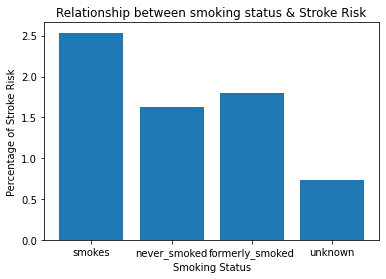

In [17]:
column_smokingstatus = df_train.groupby(['smoking_status'], as_index=False)
column_smokingstatus_count = column_smokingstatus.count()['stroke']
column_smokingstatus_sum = column_smokingstatus.sum()['stroke']
column_smokingstatus_percentage = column_smokingstatus_sum / column_smokingstatus_count * 100


plt.bar(x=[0,1,2,3], height=column_smokingstatus_percentage, tick_label=['smokes','never_smoked', 'formerly_smoked', 'unknown'])
plt.title("Relationship between smoking status & Stroke Risk")
plt.xlabel("Smoking Status")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

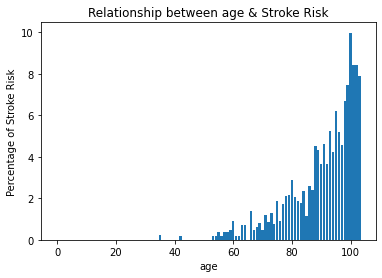

In [18]:
column_age = df_train.groupby(['age'], as_index=False)
column_age_count = column_age.count()['stroke']
column_age_sum = column_age.sum()['stroke']
column_age_percentage = column_age_sum / column_age_count * 100


plt.bar(range(len(column_age)), column_age_percentage)
plt.title("Relationship between age & Stroke Risk")
plt.xlabel("age")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

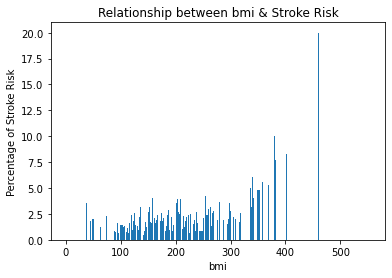

In [19]:
column_bmi = df_train.groupby(['bmi'], as_index=False)
column_bmi_count = column_bmi.count()['stroke']
column_bmi_sum = column_bmi.sum()['stroke']
column_bmi_percentage = column_bmi_sum / column_bmi_count * 100


plt.bar(range(len(column_bmi)), column_bmi_percentage)
plt.title("Relationship between bmi & Stroke Risk")
plt.xlabel("bmi")
plt.ylabel("Percentage of Stroke Risk")
plt.show()

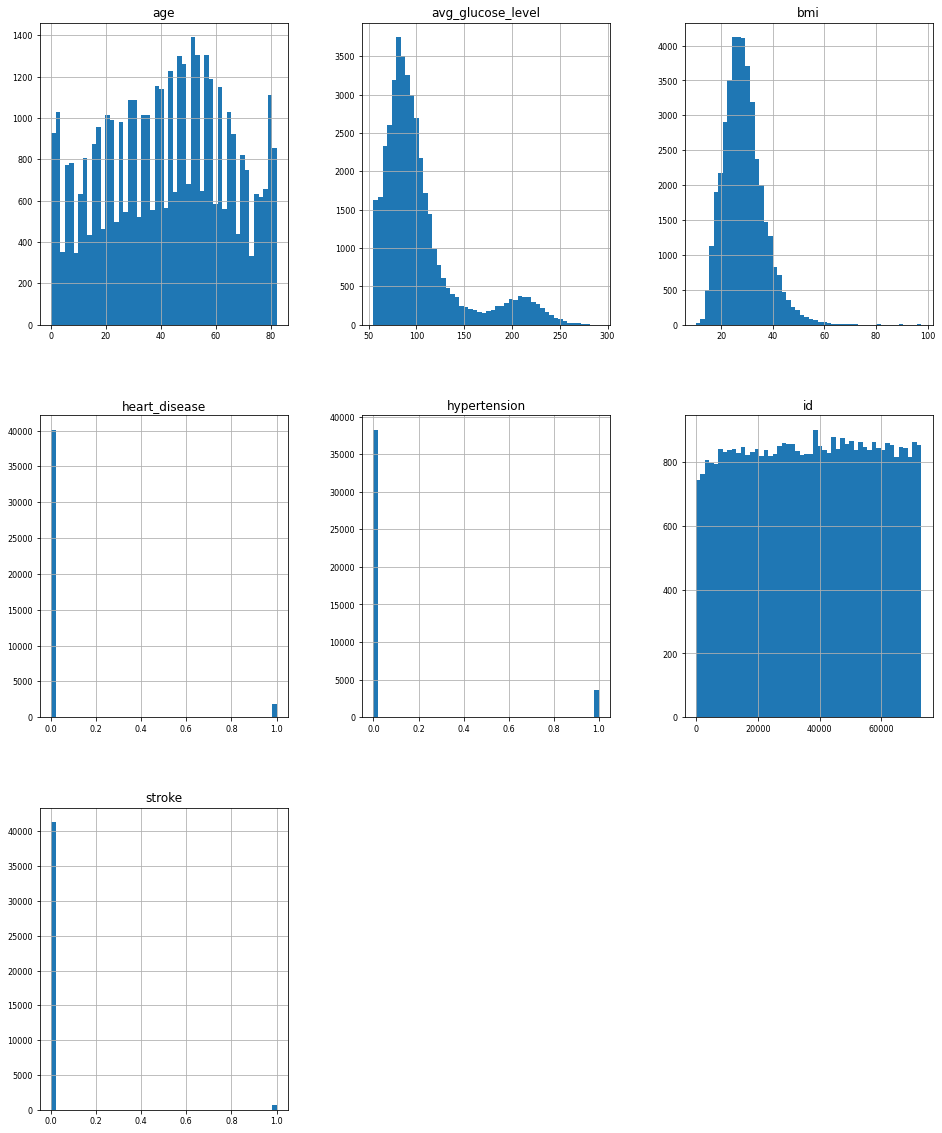

In [20]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

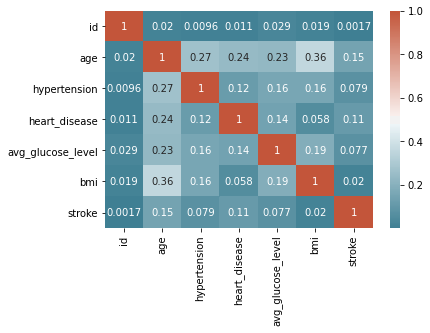

In [21]:
# calculate correlation matrix
#correlation is a measurement that describes the relationship between two variables
corr = df_train.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

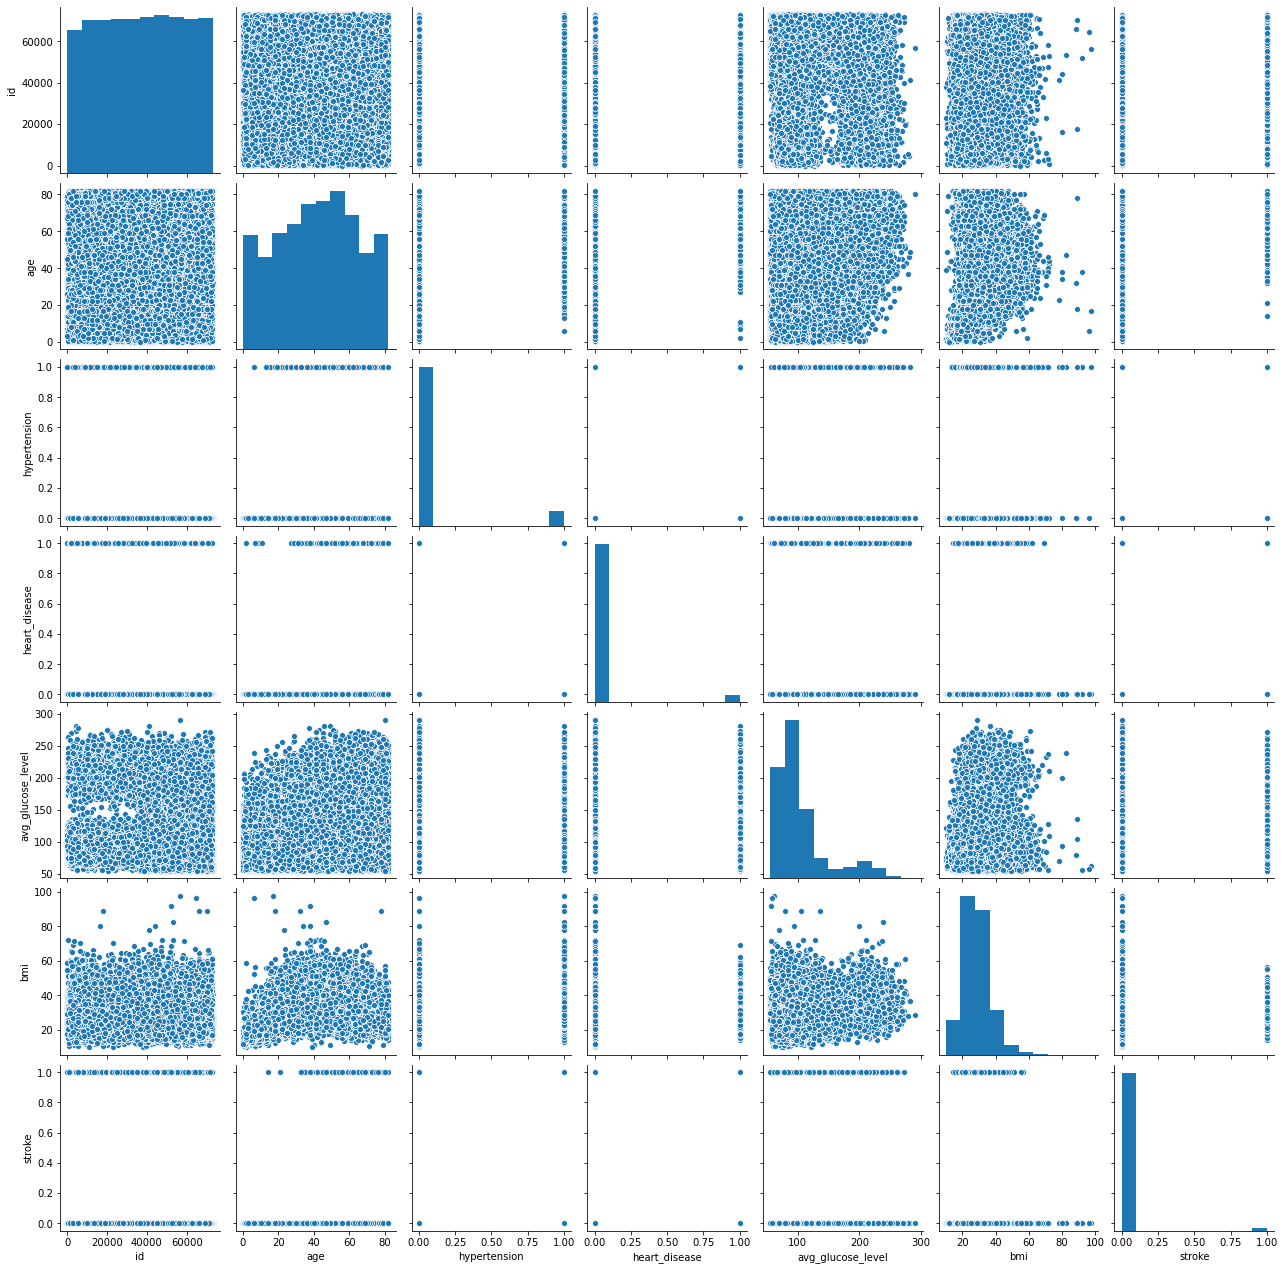

In [22]:
sns.pairplot(df_train)

In [23]:
#Drop the columns that won't be used for training 

# Delete the "id" column from the training data
df_train = df_train.drop("id", axis=1)
# Delete the "age" column from the training data
df_train = df_train.drop("age", axis=1)
# Delete the "avg_glucose_level" column from the training data
df_train = df_train.drop("avg_glucose_level", axis=1)
# Delete the "bmi" column from the training data
df_train = df_train.drop("bmi", axis=1)
# Delete the "Residence_type" column from the training data
df_train = df_train.drop("Residence_type", axis=1)
# Delete the "ever_married" column from the training data
df_train = df_train.drop("ever_married", axis=1)
# Delete the "work_type" column from the training data
df_train = df_train.drop("work_type", axis=1)
# Delete the "gender" column from the training data
df_train = df_train.drop("gender", axis=1)

In [24]:
df_train.head(10)

,hypertension,heart_disease,smoking_status,stroke
0,0,0,unknown,0
1,1,0,never smoked,0
2,0,0,unknown,0
3,0,0,formerly smoked,0
4,0,0,unknown,0
5,0,0,unknown,0
6,0,0,formerly smoked,0
7,0,1,never smoked,0
8,0,0,smokes,0
9,1,0,never smoked,0


# Encoding the smoking_status column which has categorical variabes into numerical variables

In [25]:
#a library called the ColumnTransformer, which will basically combine LabelEncoding and OneHotEncoding into just one line of code.to separate out categorical text data into numbers and different columns.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder='passthrough')

df_train = np.array(columnTransformer.fit_transform(df_train), dtype = np.str)

In [26]:
#The result after encoding is an array

print(df_train)

[['0.0' '0.0' '0.0' ... '0.0' '0.0' '0.0']
 ['0.0' '1.0' '0.0' ... '1.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' ... '0.0' '0.0' '0.0']
 ...
 ['1.0' '0.0' '0.0' ... '1.0' '0.0' '0.0']
 ['0.0' '1.0' '0.0' ... '0.0' '0.0' '0.0']
 ['0.0' '1.0' '0.0' ... '0.0' '0.0' '0.0']]


In [27]:
#convert from array to dataframe
df = pd.DataFrame(df_train, columns=['smoking_status_1','smoking_status_2','smoking_status_3','smoking_status_4','hypertension','heart_disease','stroke'])

In [28]:
df.head(10)

,smoking_status_1,smoking_status_2,smoking_status_3,smoking_status_4,hypertension,heart_disease,stroke
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Building the model using a Random Forest Classifier

In [29]:
#Let's train a RandomForest Classifier on the dataset
from sklearn.ensemble import RandomForestClassifier

X = df.drop('stroke', axis = 1) #independent variablae
y = df['stroke'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(class_weight = 'balanced')
rfc_model = rfc.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test,y_pred))


0.7349785407725322
Accuracy for Random Forest Model: 73.50
[[6096 2173]
 [  50   69]]


In [30]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.74      0.85      8269
         1.0       0.03      0.58      0.06       119

    accuracy                           0.73      8388
   macro avg       0.51      0.66      0.45      8388
weighted avg       0.98      0.73      0.83      8388



# Determining the important features

In [31]:
print(rfc.feature_importances_)
print(f" There are {len(rfc.feature_importances_)} features in total")

[0.0510907  0.0186688  0.01153348 0.15574188 0.31154181 0.45142335]
 There are 6 features in total


In [32]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

heart_disease       0.451423
hypertension        0.311542
smoking_status_4    0.155742
smoking_status_1    0.051091
smoking_status_2    0.018669
smoking_status_3    0.011533
dtype: float64

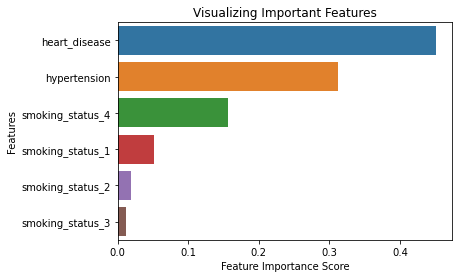

In [33]:
#I will visualize the feature scores with matplotlib and seaborn.

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()


In [34]:
#remove least important features and train model again

# Cleaning and exploring the test data

In [35]:
print(df_test.isnull().values.any())


True


In [36]:
print(df_test.isnull().sum())

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64


In [37]:
#print a summary of the train data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18601 non-null  int64  
 1   gender             18601 non-null  object 
 2   age                18601 non-null  float64
 3   hypertension       18601 non-null  int64  
 4   heart_disease      18601 non-null  int64  
 5   ever_married       18601 non-null  object 
 6   work_type          18601 non-null  object 
 7   Residence_type     18601 non-null  object 
 8   avg_glucose_level  18601 non-null  float64
 9   bmi                18010 non-null  float64
 10  smoking_status     12850 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [38]:
# replace missing values in the column smoking status with the categorical variable 'unknown'
df_test['smoking_status'] = df_test['smoking_status'].fillna('unknown')

In [39]:
print(df_test.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  591
smoking_status         0
dtype: int64


In [40]:
# drop all rows of bmi with NaN values
df_test.dropna(axis=0,inplace=True)

In [41]:
#return the top 5 rows of the test data
df_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,unknown
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,unknown
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [42]:
#Drop the columns that won't be used for testing

# Delete the "id" column from the testing data
df_test = df_test.drop("id", axis=1)
# Delete the "gender" column from the testing data
df_test = df_test.drop("gender", axis=1)
# Delete the "age" column from the testing data
df_test = df_test.drop("age", axis=1)
# Delete the "avg_glucose_level" column from the testing data
df_test = df_test.drop("avg_glucose_level", axis=1)
# Delete the "bmi" column from the testing data
df_test = df_test.drop("bmi", axis=1)
# Delete the "Residence_type" column from the testing data
df_test = df_test.drop("Residence_type", axis=1)
# Delete the "ever_married" column from the testing data
df_test = df_test.drop("ever_married", axis=1)
# Delete the "work_type" column from the testing data
df_test = df_test.drop("work_type", axis=1)


In [43]:
df_test.head(10)

,hypertension,heart_disease,smoking_status
0,0,0,formerly smoked
1,0,1,formerly smoked
2,0,0,unknown
3,0,0,unknown
4,0,0,never smoked
5,1,0,never smoked
6,0,0,unknown
7,0,0,never smoked
8,0,0,never smoked
9,0,0,smokes


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder='passthrough')

df_test = np.array(columnTransformer.fit_transform(df_test), dtype = np.str)

In [45]:
print(df_test)

[['1.0' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['1.0' '0.0' '0.0' '0.0' '0.0' '1.0']
 ['0.0' '0.0' '0.0' '1.0' '0.0' '0.0']
 ...
 ['0.0' '1.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '1.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '1.0' '0.0' '0.0']]


In [46]:
#convert from array to dataframe
test_data = pd.DataFrame(df_test, columns=['smoking_status_1','smoking_status_2','smoking_status_3','smoking_status_4','hypertension','heart_disease'])

In [47]:
test_data.head(10)

,smoking_status_1,smoking_status_2,smoking_status_3,smoking_status_4,hypertension,heart_disease
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0


# Using the model and test data to predict the target variable(stroke)

In [48]:
predict_data = rfc_model.predict(test_data)

In [49]:
print(predict_data)

['1.0' '1.0' '0.0' ... '0.0' '0.0' '0.0']


In [50]:
#convert from array to a dataframe
predict_results = pd.DataFrame(predict_data, columns=['stroke'])

In [51]:
predict_results.head(20)

,stroke
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0
